In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
from selenium.common.exceptions import NoSuchElementException   
import progressbar

import numpy as np

options = Options()
options.headless = True
options.add_argument("--window-size=1920,20200") #this is important, to tell it how much of the webpage to import
driver = webdriver.Chrome(options=options, executable_path=r'/usr/local/bin/chromedriver')

In [68]:
def formazioni(competizione = 'campionato'):
    #if competizione == 'campionato':
    link = 'https://leghe.fantacalcio.it/fantapalla-forever/formazioni?id=185855'
    driver.get(link)

    players = {}
    for l in [2,3,4,5]:
        for k in [1,2]:
            name = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text


            all_playersE = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[1]/tbody/tr[@class='player-list-item even  ']/td[1]/span/span[2]/a")
            all_playersO = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[1]/tbody/tr[@class='player-list-item odd  ']/td[1]/span/span[2]/a")
            all_playersEP = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item even  ']/td[1]/span/span[2]/a")
            all_playersOP = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item odd  ']/td[1]/span/span[2]/a")
            #all_playersE = driver.find_elements_by_xpath("")

            all_pl = all_playersE + all_playersO + all_playersEP + all_playersOP
            names = []
            for pl in all_pl:
                names.append((pl.text).upper())
            players[name] = names
    return pd.DataFrame.from_dict(data=players, orient='index').T

In [3]:
link = 'https://leghe.fantacalcio.it/fantapalla-forever/area-gioco/rose'
    
driver.get(link)
rose = {}


for j in range(1,9):
    test_1 = []
    name = (driver.find_element_by_xpath('/html/body/div[7]/main/div[3]/div[2]/div[1]/div[2]/div[2]/ul/li['+str(j)+']/div/div[1]/div[2]/h4').text).upper()
    players = driver.find_elements_by_xpath('/html/body/div[7]/main/div[3]/div[2]/div[1]/div[2]/div[2]/ul/li['+str(j)+']/table/tbody/tr[@class]/td[2]/a/b')
    for pl in players:
        test_1.append((pl.text).upper())

    rose[name] = test_1

In [21]:
def rose(link = 'https://leghe.fantacalcio.it/fantapalla-forever/area-gioco/rose'):
    
    driver.get(link)
    rose = {}


    for j in range(1,9):
        test_1 = []
        name = (driver.find_element_by_xpath('/html/body/div[7]/main/div[3]/div[2]/div[1]/div[2]/div[2]/ul/li['+str(j)+']/div/div[1]/div[2]/h4').text).upper()
        players = driver.find_elements_by_xpath('/html/body/div[7]/main/div[3]/div[2]/div[1]/div[2]/div[2]/ul/li['+str(j)+']/table/tbody/tr[@class]/td[2]/a/b')
        for pl in players:
            test_1.append((pl.text).upper())

        rose[name] = test_1
        
        
    return pd.DataFrame.from_dict(data=rose, orient='index').T

In [16]:
def infortunati(link = 'https://www.pianetafanta.it/Giocatori-Infortunati.asp'):

    driver.get(link)
    names = driver.find_elements_by_xpath("//*[@id='my_id_div']/div[6]/div[11]/div[2]/div/div[@class]/div/table/tbody/tr[@class]/td[2]/a/strong")

    players = []
    for n in names:
        players.append(n.text.upper())

    return players

In [22]:
I=infortunati()

In [23]:
R=rose()

In [50]:
def count_inf(I , R ):
    count = {}
    #test = list(filter(None,I.values.flatten()))
    #separator = ','
    all_names = ''.join(I)
    for team in R:
        c = 0
        for player in R[team]:
            if player == None:
                continue
            if player in ''.join(I):
                c+=1
        count[team] = c
    return pd.DataFrame(data = count, index = ['tot Infortunati'])

In [51]:
count_inf(I,R)

,XYZ,MAINZ NA GIOIA,I DISEREDATI,PALLA PAZZA,AS 800A,PDG 1908,SOROS FC,IGNORANZA EVERYWHERE
tot Infortunati,14,8,6,3,5,7,9,8


In [7]:
import time

In [67]:
def infortunati(link = 'https://www.fantacalcio.it/cartella-medica/'):

    driver.get(link)
    button = driver.find_element_by_id("tabAll")

    driver.execute_script("arguments[0].click();", button)

    test = driver.find_elements_by_xpath("/html/body/div[7]/div[5]/main/div/div/div/div[1]/div[2]/div[5]/div[@class]/div/div/div[2]/div/div[1]/p[@class]/span")
    all_inf = []
    for pl in test:
        all_inf.append(pl.text)
    return all_inf

In [33]:
def voti_panchina(giornata):
    link = 'https://leghe.fantacalcio.it/fantapalla-forever/formazioni/'+str(giornata)
    driver.get(link)

    all_voti = {}
    for l in [2,3,4,5]:
        for k in [1,2]:
            name = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text
            #name = driver.find_element_by_xpath("/html/body/div[12]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text
            Fvoto_o = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class = 'player-list-item odd  ']/td[5]/span")
            Nvoto_o = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class = 'player-list-item odd  ']/td[4]/span")
            Fvoto_e = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class = 'player-list-item even  ']/td[5]/span")
            Nvoto_e = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class = 'player-list-item even  ']/td[4]/span")
            Fvoti = Fvoto_o + Fvoto_e
            Nvoti = Nvoto_o + Nvoto_e
            tot = []
            for i in range(len(Fvoti)):
                if Fvoti[i].text != '-':
                    tot.append(max(0,float(Fvoti[i].text)-float(Nvoti[i].text)))
            all_voti[name] = [sum(tot)]
    return pd.DataFrame(data=all_voti,index = ['Voti Panchinari'])

In [34]:
voti_panchina(giornata=1)

,AS 800A,PDG 1908,Ignoranza Everywhere,soros fc,Mainz na gioia,Palla Pazza,I Diseredati,XYZ
Voti Panchinari,1.5,1.75,0,0.5,0.75,3.0,1.75,0


In [16]:
def goal_subiti(giornata):
    link = 'https://leghe.fantacalcio.it/fantapalla-forever/formazioni/'+str(giornata)
    driver.get(link)

    all_goal = {}
    for l in [2,3,4,5]:
        for k in [1,2]:
            name = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text
            if len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[1]/tbody/tr[@class='player-list-item even  out']/td[@class='cell-text cell-primary x7 smart-x9 smart-role role-p']")) == 0:

                goal = len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[1]/tbody/tr[1]/td[3]/ul/li[@data-original-title='Gol subito (-0.5)']"))
            else:
                goal1 = len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item even in ']/td[3]/ul/li[@data-original-title='Gol subito (-0.5)']"))
                goal2 = len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item odd in ']/td[3]/ul/li[@data-original-title='Gol subito (-0.5)']"))
                goal = max(goal1,goal2)
            all_goal[name] = goal

    return pd.DataFrame(data=all_goal,index = ['Goal subiti'])



In [17]:
goal_subiti(giornata=1)

,AS 800A,PDG 1908,Ignoranza Everywhere,soros fc,Mainz na gioia,Palla Pazza,I Diseredati,XYZ
Goal subiti,2,2,3,1,1,2,3,0


In [4]:
def modificatore(giornata):
    link = 'https://leghe.fantacalcio.it/fantapalla-forever/formazioni/'+str(giornata)
    driver.get(link)

    all_mod = {}
    for l in [2,3,4,5]:
        for k in [1,2]:
            name = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text.upper()
            all_mod[name] = 0
            temp = driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[3]/tbody/tr/td[1]/span")
            if len(temp)>0 and temp[0].text == 'Modificatore Difesa':
                mod = float(driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[3]/tbody/tr/td[2]/span").text)
                all_mod[name] = int(mod)
    return pd.DataFrame(data=all_mod, index = ['Modificatore'])

In [5]:
modificatore(2)

,PDG 1908,I DISEREDATI,XYZ,MAINZ NA GIOIA,PALLA PAZZA,IGNORANZA EVERYWHERE,SOROS FC,AS 800A
Modificatore,0,1,0,0,1,1,0,0


In [29]:
def cartellini(giornata):
    link = 'https://leghe.fantacalcio.it/fantapalla-forever/formazioni/'+str(giornata)
    driver.get(link)

    all_cart = {}
    for l in [2,3,4,5]:
        for k in [1,2]:
            name = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text.upper()
            gialli = len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[1]/tbody/tr[@data-id]/td[3]/ul/li[@data-original-title='Ammonizione (-0.25)']"))
            gialliPE= len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item even in ']/td[3]/ul/li[@data-original-title='Ammonizione (-0.25)']"))
            gialliPO= len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item odd in ']/td[3]/ul/li[@data-original-title='Ammonizione (-0.25)']"))
            rossi =  len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[1]/tbody/tr[@data-id]/td[3]/ul/li[@data-original-title='Espulso (-0.5)']"))
            rossiPE=len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item even in ']/td[3]/ul/li[@data-original-title='Espulso (-0.5)']"))
            rossiPO=len(driver.find_elements_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[2]/tbody/tr[@class='player-list-item odd in ']/td[3]/ul/li[@data-original-title='Espulso (-0.5)']"))
            all_cart[name] = [gialli+gialliPE+gialliPO, rossi]
    return pd.DataFrame(data=all_cart,index = ['C. gialli','C. rossi'])

In [30]:
cartellini(1)

,AS 800A,PDG 1908,IGNORANZA EVERYWHERE,SOROS FC,MAINZ NA GIOIA,PALLA PAZZA,I DISEREDATI,XYZ
C. gialli,2,1,1,2,1,1,3,4
C. rossi,0,0,0,0,0,0,0,1


In [25]:
def fantapunti_subiti(giornata):
    link = 'https://leghe.fantacalcio.it/fantapalla-forever/formazioni/'+str(giornata)
    driver.get(link)

    all_punti = {}
    for l in [2,3,4,5]:
        name={}
        punti={}
        for k in [1,2]:
            name[k] = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[1]/div["+str(k)+"]/div/div[2]/h4").text.upper()
            punti[k] = driver.find_element_by_xpath("/html/body/div[7]/main/div[3]/div[2]/div[1]/div[1]/div/div[2]/div["+str(l)+"]/div[2]/div["+str(k)+"]/table[4]/tfoot/tr/td[2]/div").text[:-7]
        all_punti[name[1]]=punti[2]
        all_punti[name[2]]=punti[1]
            
    return pd.DataFrame(data=all_punti,index = ['Fantapunti Subiti'])            

In [26]:
fantapunti_subiti(giornata=1)

,AS 800A,PDG 1908,IGNORANZA EVERYWHERE,SOROS FC,MAINZ NA GIOIA,PALLA PAZZA,I DISEREDATI,XYZ
Fantapunti Subiti,68.5,75.5,65.75,79,71.75,70.75,72.25,67.5


In [10]:
def storico_IG(giornata, dict_names, path = "test_data/"):

    test_dict={
        'enzo':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'pietro':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'mario':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'federico':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'francesco':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'nanni':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'emiliano':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']},
        'luca':{0:['gg','pf','ps','gs','c','pan','mod','inf','nome']}}
    for i in range(1,giornata+1):
        G=pd.read_pickle(path+"Giornata_"+str(i)+".pkl")
        for team, content in G.items():
            test_dict[dict_names[team]][i] = [i, content[0], float(content[1]), content[2], content[3]+2*content[4], content[5], content[6], content[7], dict_names[team]]
    return(test_dict)

In [11]:
def storico_individuale(nome, giornata):
    dict_names={
    'AS 800A': 'enzo',
    'PDG 1908': 'pietro',
    'IGNORANZA EVERYWHERE': 'mario',
    'SOROS FC': 'federico',
    'MAINZ NA GIOIA': 'francesco',
    'PALLA PAZZA': 'nanni',
    'I DISEREDATI': 'emiliano',
    'XYZ': 'luca'
    }

    test_dict = storico_IG(giornata, dict_names)
    
    df = pd.DataFrame(data=test_dict[nome]).T
    new_header = df.iloc[0] #grab the first row for the header
    df = df[1:] #take the data less the header row
    df.columns = new_header
    return df

In [12]:
storico_individuale(nome = 'pietro', giornata = 2)

,gg,pf,ps,gs,c,pan,mod,inf,nome
1,1,68.5,75.5,2,1,35.25,0,5,pietro
2,2,68.5,75.5,2,1,35.25,0,5,pietro


In [6]:
list(dict_names.keys())

['AS 800A',
 'PDG 1908',
 'IGNORANZA EVERYWHERE',
 'SOROS FC',
 'MAINZ NA GIOIA',
 'PALLA PAZZA',
 'I DISEREDATI',
 'XYZ']

In [13]:
#for el, el1 in inp.items():
#    df = pd.DataFrame(columns = ['gg', 'pf', 'ps', 'gs', 'c', 'pan', 'mdif', 'inf', 'nome'])
#    df.to_pickle('individual_data/'+str(dict_names[el])+'.pkl')
    #giornata, punti fatti, punti subiti, gol subiti, cartellini, bonus in panchina, modificatore difesa, infortuni

In [20]:
example = pd.read_pickle('individual_data/emiliano.pkl')

In [25]:
for team, content in G1.items():
    temp = 1

In [19]:
c['Fantapunti Fatti']

72.25

In [1]:
import matplotlib
matplotlib.matplotlib_fname()

'/Users/lucaagozzino/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc'

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from matplotlib.patches import Patch

#from crea_df import storico_individuale
from matplotlib.offsetbox import OffsetImage,AnnotationBbox

from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 11.7,8.27
# Set the style globally
plt.style.use('default')
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = 'Exo 2'
rcParams['font.weight'] = 500
#rcParams['font.monospace'] = 'Ubuntu Mono'
rcParams['font.size'] = 16
rcParams['axes.labelsize'] = 16
rcParams['axes.labelweight'] = 500
rcParams['axes.titleweight'] = 600
rcParams['axes.titlesize'] = 16
rcParams['xtick.labelsize'] = 14
rcParams['ytick.labelsize'] = 14
rcParams['legend.fontsize'] = 12
rcParams['figure.titlesize'] = 18

import os

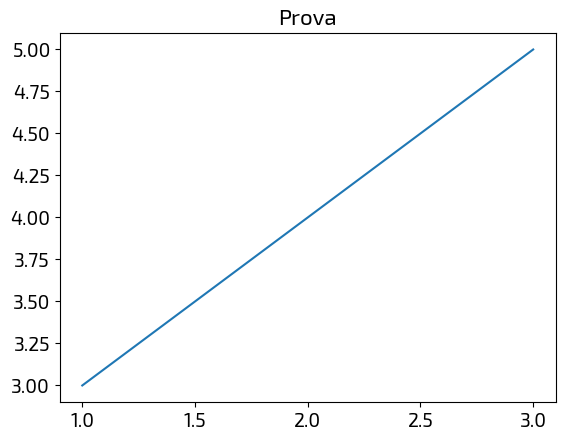

In [99]:
plt.plot([1,2,3],[3,4,5])
plt.title('Prova')
plt.show()

In [3]:
matplotlib.font_manager._rebuild()

NameError: name 'matplotlib' is not defined

In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def say_my_name(name):
    """
    Print the current widget value in short sentence
    """
    print(f'My name is {name}')
     
widgets.interact(say_my_name, name=["Jim", "Emma", "Bond"]);

interactive(children=(Dropdown(description='name', options=('Jim', 'Emma', 'Bond'), value='Jim'), Output()), _…